<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

## Load and Prepare Data

In [73]:
train_set=pd.read_csv("train.csv")
test_set=pd.read_csv("test.csv")
samplesub_set=pd.read_csv("sampleSubmission.csv")

## EDA

In [93]:
train_set.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13


In [94]:
train_set.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


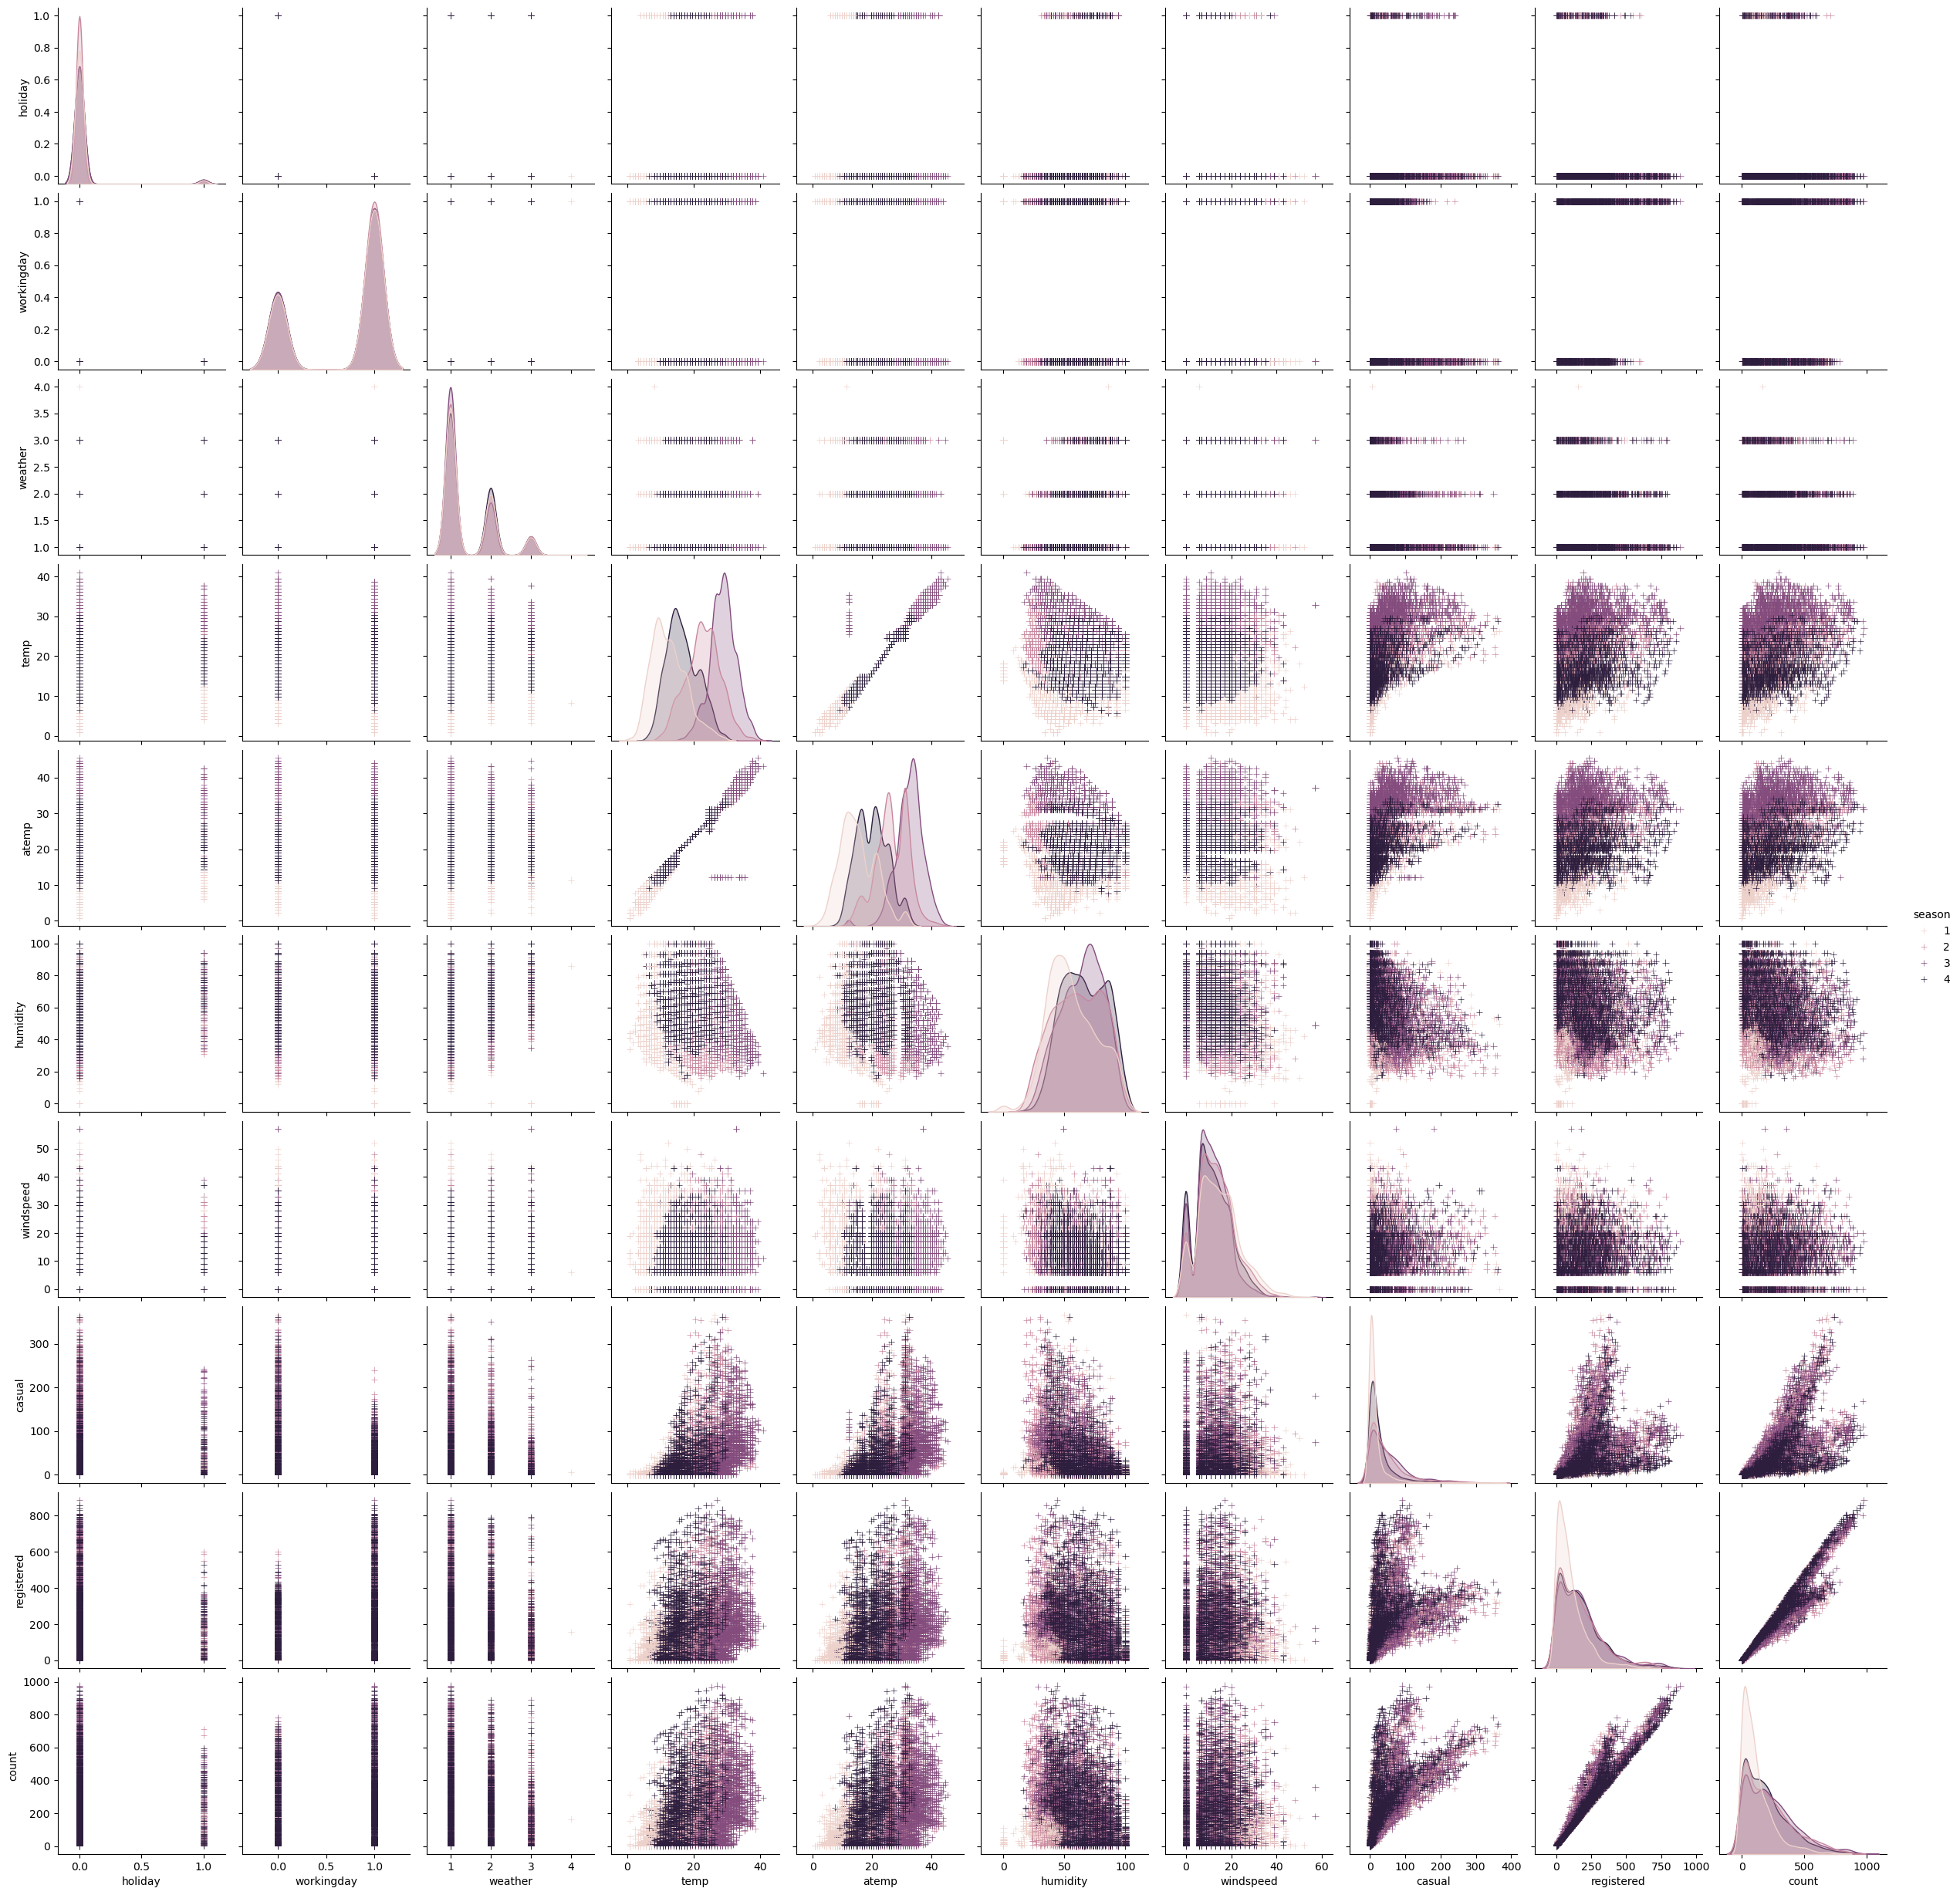

salam


In [95]:
g=sns.pairplot(train_set, hue='season', markers='+')
plt.show()
print("salam")  #this is for checking that our plotting is finished.

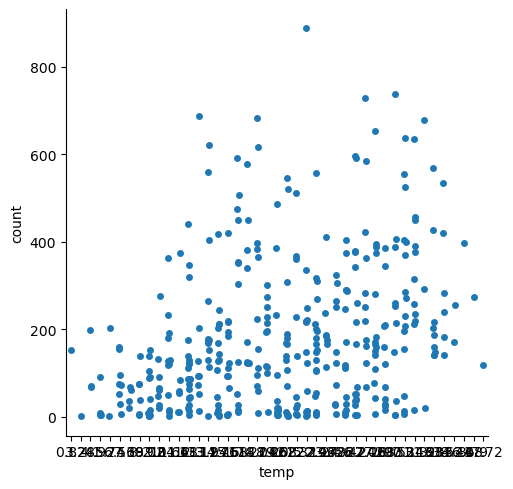

In [96]:
sns.catplot(x="temp", y='count', data=train_set.sample(400))   #I use sample() function to be shown better.

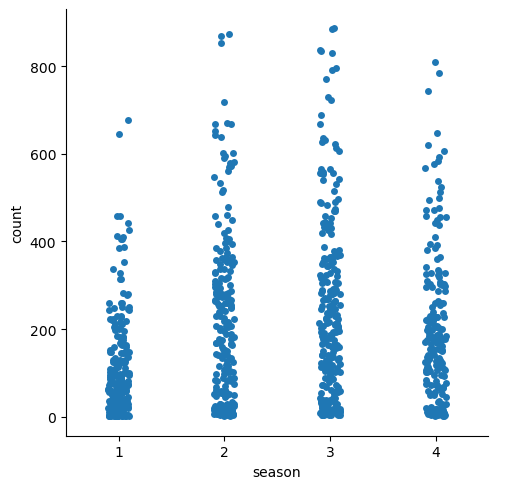

In [97]:
sns.catplot(x='season', y='count', data=train_set.sample(900))

In [124]:
corr_value=train_set.corr()
corr_value

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [98]:
train_set.shape

(10886, 12)

In [99]:
train_set.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [100]:
train_set.drop("datetime", axis=1, inplace=True)  #datetime is not usable for our model.
test_set.drop('datetime', axis=1, inplace=True)

In [101]:
train_set.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [116]:
train_set.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [103]:
test_set

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,1,1,10.66,11.365,56,26.0027
1,1,0,1,1,10.66,13.635,56,0.0000
2,1,0,1,1,10.66,13.635,56,0.0000
3,1,0,1,1,10.66,12.880,56,11.0014
4,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014
6489,1,0,1,2,10.66,12.880,60,11.0014
6490,1,0,1,1,10.66,12.880,60,11.0014
6491,1,0,1,1,10.66,13.635,56,8.9981


## Train your model (Regression)

## multiple regression

In [108]:
x=train_set.drop('count', axis=1)
y=train_set['count']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=3)

In [127]:
mlreg=LinearRegression()

In [128]:
mlreg.fit(x_train, y_train)

LinearRegression()

In [129]:
y_predict=mlreg.predict(x_test)

In [130]:
y_predict

array([172.,   4.,  37., ..., 304.,   9., 388.])

<Axes: xlabel='count', ylabel='Count'>

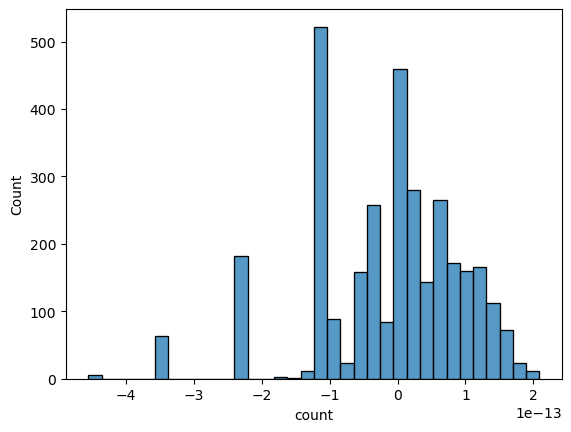

In [131]:
sns.histplot(y_test-y_predict)

In [132]:
print("mean absolute error: ", metrics.mean_absolute_error(y_test, y_predict))

mean absolute error:  8.21664978690846e-14


## linear regression

In [117]:
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0000,3,13
1,1,0,0,1,9.02,13.635,80,0.0000,8,32
2,1,0,0,1,9.02,13.635,80,0.0000,5,27
3,1,0,0,1,9.84,14.395,75,0.0000,3,10
4,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117


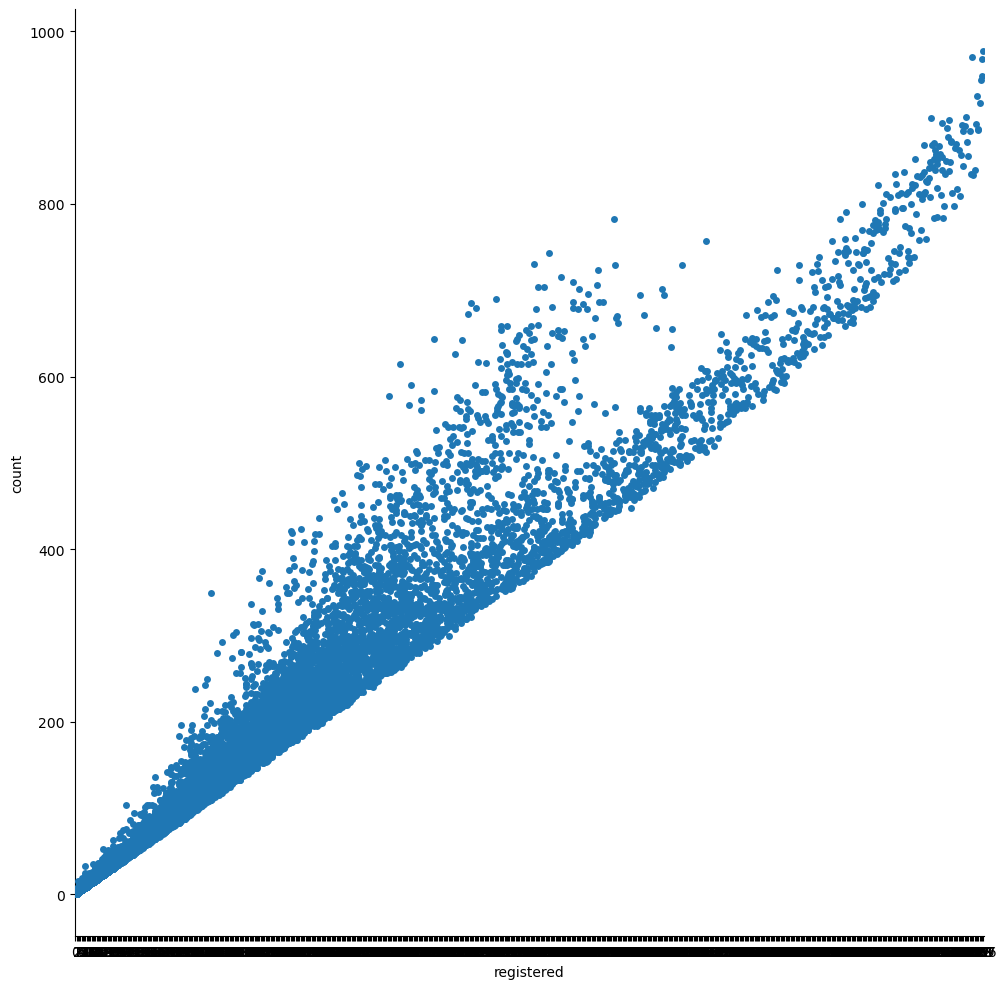

In [120]:
sns.catplot(x='registered', y='count', data=train_set, height=10)

In [151]:
x=train_set['registered']
y=train_set['count']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=4)
x_train=x_train.to_frame()
x_test=x_test.to_frame()
y_train=y_train.to_frame()
y_test=y_test.to_frame()

In [152]:
lreg=LinearRegression()

In [153]:
lreg.fit(x_train, y_train)

LinearRegression()

In [154]:
y_pred=lreg.predict(x_test)

<Axes: ylabel='Count'>

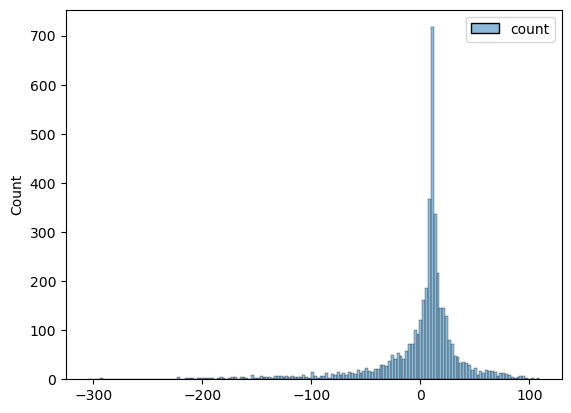

In [155]:
sns.histplot(y_pred - y_test)

In [157]:
print("mean absolute error:   ", metrics.mean_absolute_error(y_test, y_pred))

mean absolute error:    26.80753409147004


## KNN regression

In [158]:
from sklearn.neighbors import KNeighborsRegressor

In [162]:
x=train_set.drop("count", axis=1)
y=train_set['count']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state=5)

In [164]:
knn=KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [165]:
y_pred=knn.predict(x_test)

<Axes: xlabel='count', ylabel='Count'>

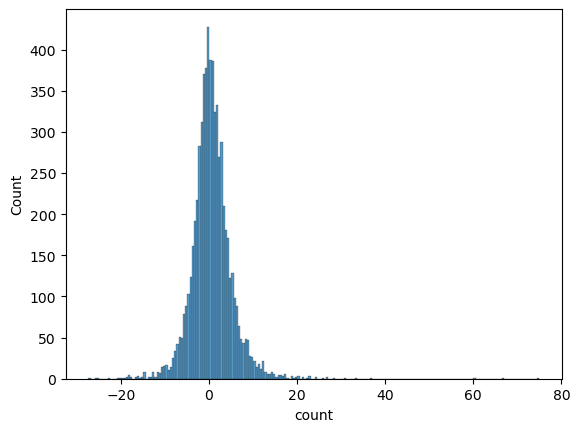

In [167]:
sns.histplot(y_test-y_pred)

## decision tree regression

In [169]:
from sklearn.tree import DecisionTreeRegressor

In [172]:
x=train_set.drop('count', axis=1)
y=train_set['count']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state=6)

In [173]:
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [174]:
y_pred=dtr.predict(x_test)

<Axes: xlabel='count', ylabel='Count'>

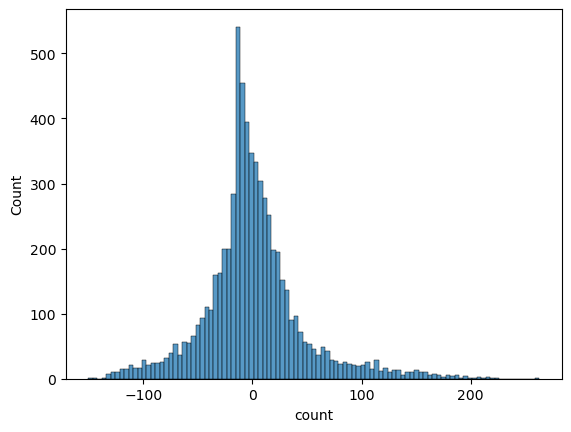

In [175]:
sns.histplot(y_test-y_pred)

## random forest regression

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
x=train_set.drop('count', axis=1)
y=train_set['count']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state=5)

In [179]:
rfr=RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [180]:
y_pred=rfr.predict(x_test)

<Axes: xlabel='count', ylabel='Count'>

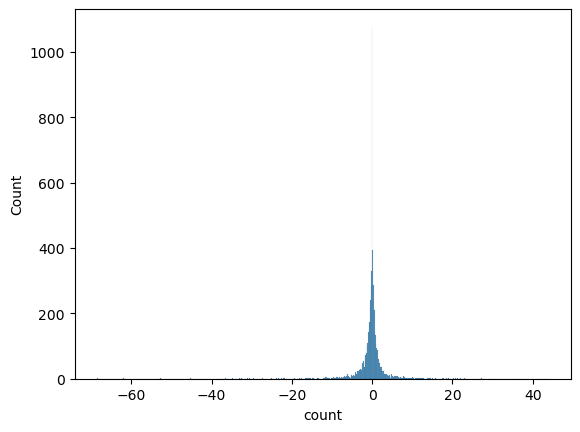

In [181]:
sns.histplot(y_pred-y_test)